<a href="https://colab.research.google.com/github/blessyann/MachineLearning/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded1 = files.upload()

Saving test.csv to test.csv


In [0]:
from google.colab import files
uploaded2 = files.upload()

Saving train.csv to train.csv


In [0]:
from google.colab import files
uploaded3 = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [0]:
import io
dftest = pd.read_csv(io.BytesIO(uploaded1['test.csv']))
dftrain = pd.read_csv(io.BytesIO(uploaded2['train.csv']))
dfgender = pd.read_csv(io.BytesIO(uploaded3['gender_submission.csv']))

In [0]:
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [0]:
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
dfgender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
dftest.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
dftrain.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
dfgender.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [0]:
# Check for null values in train dataset
percent_missing = dftrain.isnull().sum() * 100 / len(dftrain)
missing_value_df = pd.DataFrame({'column_name': dftrain.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False,inplace=True)
missing_value_df

,column_name,percent_missing
Cabin,Cabin,77.104377
Age,Age,19.865320
Embarked,Embarked,0.224467
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
SibSp,SibSp,0.000000
Parch,Parch,0.000000


In [0]:
# Check for null values in test dataset
percent_missing = dftest.isnull().sum() * 100 / len(dftest)
missing_value_df_test = pd.DataFrame({'column_name': dftest.columns,
                                 'percent_missing': percent_missing})
missing_value_df_test.sort_values('percent_missing', ascending=False,inplace=True)
missing_value_df_test

,column_name,percent_missing
Cabin,Cabin,78.229665
Age,Age,20.574163
Fare,Fare,0.239234
PassengerId,PassengerId,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000


In [0]:
# Let us create a copy of dataframe for backup and impute null with 0 in test dataset
backup_dftest = dftest.copy
dftest = dftest.drop('Cabin',axis=1)
dftest = dftest.fillna(0)

In [0]:
# The df has no Null values
(dftest['Age'].isnull().sum()/len(dftest)) * 100

0.0

In [0]:
# Let us create a copy of dataframe for backup and impute null with 0 in train dataset
backup_dftrain = dftrain.copy
dftrain = dftrain.drop('Cabin',axis=1)
dftrain = dftrain.fillna(0)

In [0]:
# The df has no Null values
(dftrain['Age'].isnull().sum()/len(dftrain)) * 100

0.0

**Data Visualization**


> Gives a good sense od data

> Target variable is Survived or Not Survived 1--> Survived, 0-->Not Survived








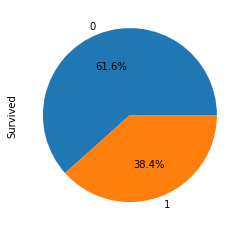

In [0]:
dftrain['Survived'].value_counts().plot(kind='pie',autopct='%1.1f%%')

from the graph we can understand that 62% of Passengers were Survived. 

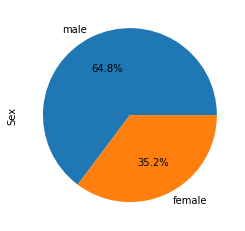

In [0]:
# Survival rate baded on Sex (Male and Female)
dftrain['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

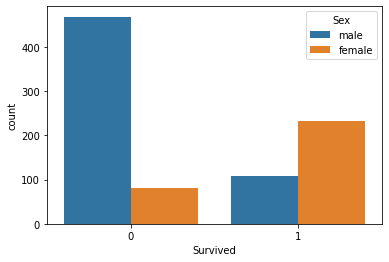

In [0]:
sns.countplot(x='Survived',hue='Sex',data=dftrain)

From the graph, the Survival rate in female is higher as compared to male

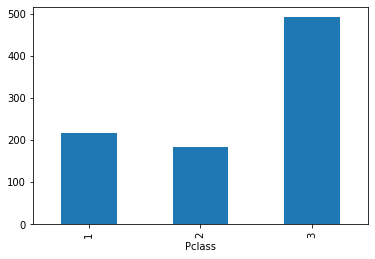

In [0]:
#Passenger class and Survival
dftrain.groupby(['Pclass'])['Survived'].count().plot(kind='bar')